Today I finally go around to fixing our leaking toilet, which I'm afraid has been hissing since we moved in. It occured to me that, in addition to adding a new meter reading today so that I can see how this affects our water usage moving forward, I should also have a dataset containing events such as this that I can draw as markers on any graphs I create. That's what I'm going to do here.

To start, I'm going to import and format the data as I did in my first notebook. I'll spare you the commentary here and just get to it.

In [1]:
# Standard imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read data and convert date data to pandas datetime object
meter = pd.read_csv('../data/water.csv')
meter.date = pd.to_datetime(meter.date)

# Add columns for calculating the deltas
meter['time_delta'] = meter.date.diff().dt.days
meter['meter_delta'] = meter.meter.diff()

# Add columns for average daily usage and projected 60-day usage
meter['daily'] = meter.meter_delta / meter.time_delta
meter['bimonthly'] = meter.daily * 60

meter

,date,meter,time_delta,meter_delta,daily,bimonthly
0,2021-10-05,899.00,NaN,NaN,NaN,NaN
1,2021-11-15,923.00,41.0,24.00,0.585366,35.121951
2,2021-12-01,927.78,16.0,4.78,0.298750,17.925000
3,2021-12-12,928.99,11.0,1.21,0.110000,6.600000
4,2021-12-19,929.90,7.0,0.91,0.130000,7.800000
5,2022-01-03,931.76,15.0,1.86,0.124000,7.440000
6,2022-01-11,932.77,8.0,1.01,0.126250,7.575000
7,2022-01-21,934.23,10.0,1.46,0.146000,8.760000
8,2022-01-25,934.77,4.0,0.54,0.135000,8.100000
9,2022-02-02,936.48,8.0,1.71,0.213750,12.825000


Above is what we ended up with in the first notebook.

The next task is to chart the data, as before, except to add some helpful annotations to point out events. So, first let's import our events data and see what we're dealing with.

In [2]:
events = pd.read_csv('../data/water-events.csv')
events

,date,event
0,2021-11-18,Shut off water valve for irrigation
1,2021-12-04,System test
2,2022-01-22,Irrigation repair; Zones 1-4 @ 50 mins/wk
3,2022-02-03,Zone 1 off; Zones 2-4 @ 50 mins/wk
4,2022-02-09,Zone 4 off; Zones 1-3 @ 50 mins/wk
5,2022-03-04,Irrigation repair; Zones 1-4 @ 20 mins/wk
6,2022-03-11,Zones 1-2 @ 10 mins/wk; Zones 3-4 @ 30 mins/wk
7,2022-03-30,Zones 1-2 @ 2 mins/wk
8,2022-06-08,50 gals to refill new water heater
9,2022-06-09,Fix toilet leak


To get the annotations where we want them, we'll need x and y coordinates. We have the x coordinates (the date), but, because my meter readings are irregular, we may not have a corresponding y coordinate (projected bimonthly water usage)--unless, of course, I happen to have taken a meter reading on the same day an event occurred. To immediately see where we're missing y-axis data, let's join these two DataFrames:

In [3]:
# First, convert the events.date column to a pandas datetime object so we can merge
events.date = pd.to_datetime(events.date)

# Then, let's merge
merged = pd.merge(left=meter, right=events, how='outer', on='date')
merged

,date,meter,time_delta,meter_delta,daily,bimonthly,event
0,2021-10-05,899.00,NaN,NaN,NaN,NaN,NaN
1,2021-11-15,923.00,41.0,24.00,0.585366,35.121951,NaN
2,2021-12-01,927.78,16.0,4.78,0.298750,17.925000,NaN
3,2021-12-12,928.99,11.0,1.21,0.110000,6.600000,NaN
4,2021-12-19,929.90,7.0,0.91,0.130000,7.800000,NaN
5,2022-01-03,931.76,15.0,1.86,0.124000,7.440000,NaN
6,2022-01-11,932.77,8.0,1.01,0.126250,7.575000,NaN
7,2022-01-21,934.23,10.0,1.46,0.146000,8.760000,NaN
8,2022-01-25,934.77,4.0,0.54,0.135000,8.100000,NaN
9,2022-02-02,936.48,8.0,1.71,0.213750,12.825000,NaN


Now we'll have <code>NaN</code> in all the meter fields where there was an event but no meter reading, and vice versa when there was a meter reading but no event recorded. All that remains is to sort our new dataframe and then fill in the missing bimonthly projection numbers (since that's what's being charted). To take advantage of the interpolation function's <code>time</code> method, I'll first set our <code>date</code> field as a pandas <code>DateTimeIndex</code>, and then I'll generate values for the missing <code>bimonthly</code> values.

In [4]:
# Sort by date
merged.sort_values(by=['date'], inplace=True)

# Set index
merged.set_index('date', inplace=True)

# Generate values for missing 'bimonthly' data
merged['bimonthly'] = merged.bimonthly.interpolate(method='time')

merged

,meter,time_delta,meter_delta,daily,bimonthly,event
date,,,,,,
2021-10-05,899.00,NaN,NaN,NaN,NaN,NaN
2021-11-15,923.00,41.0,24.00,0.585366,35.121951,NaN
2021-11-18,NaN,NaN,NaN,NaN,31.897523,Shut off water valve for irrigation
2021-12-01,927.78,16.0,4.78,0.298750,17.925000,NaN
2021-12-04,NaN,NaN,NaN,NaN,14.836364,System test
2021-12-12,928.99,11.0,1.21,0.110000,6.600000,NaN
2021-12-19,929.90,7.0,0.91,0.130000,7.800000,NaN
2022-01-03,931.76,15.0,1.86,0.124000,7.440000,NaN
2022-01-11,932.77,8.0,1.01,0.126250,7.575000,NaN


And just to confirm that our new <code>bimonthly</code> data approximates our original <code>meter</code> DataFrame, let's chart that new <code>merged</code> data as a scatter chart over a line chart of our <code>meter</code> data. If all goes well, our new points should fall on top of the line.

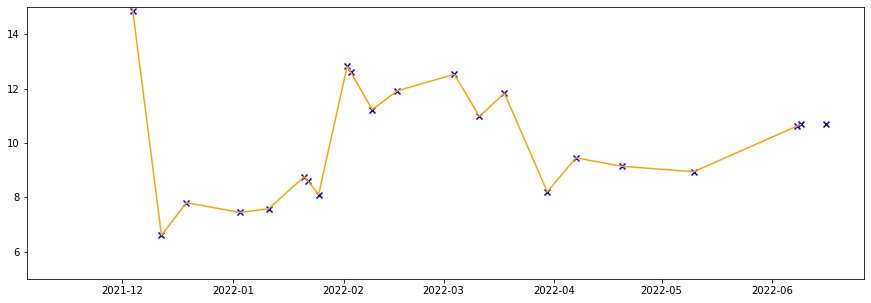

In [5]:
plt.figure(figsize=(15,5))
plt.ylim((5,15))
plt.plot(meter.date, meter.bimonthly, c='orange')
plt.scatter(merged.index, merged.bimonthly, c='blue', marker='x');

Now we're ready to add annotations.

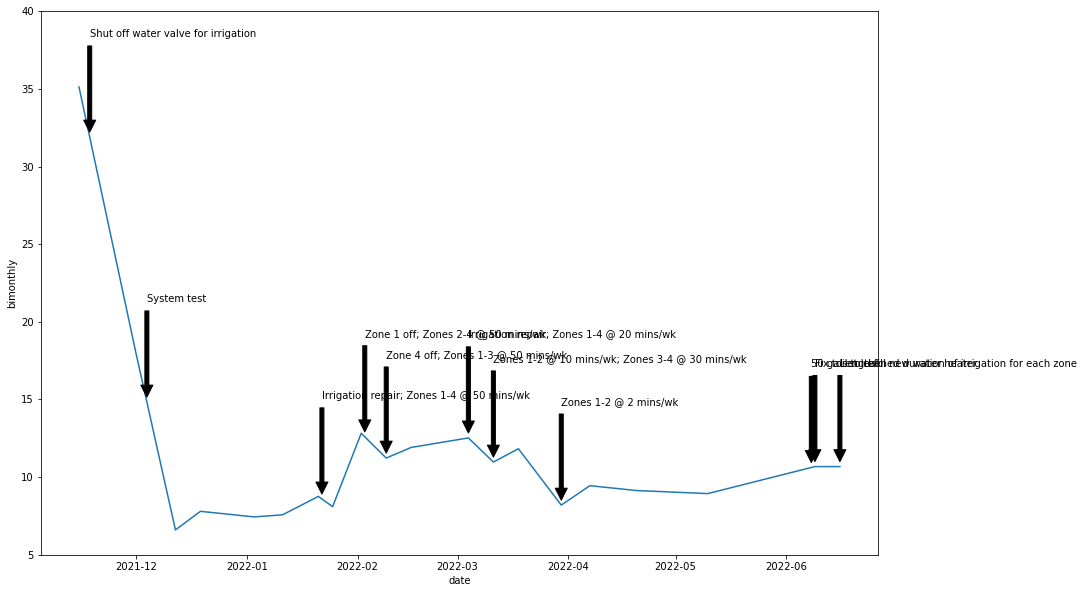

In [6]:
# Create figure
fig, ax = plt.subplots(figsize=(15,10))

# Draw line plot
sns.lineplot(x=merged.index, y=merged.bimonthly)

# Create a new DataFrame that holds just the data needed for our annotations
annotations = merged[merged.event.notnull()][['bimonthly','event']]

# Loop through annotations dataframe
for index, row in annotations.iterrows():
    ax.annotate(
        row['event'], 
        xy=(index, row['bimonthly']),
        xycoords='data',
        textcoords='offset pixels',
        xytext=(0, 100),
        arrowprops=dict(facecolor='black', shrink=-.05)
    )

ax.set(ylim=(5,40));

It's a bit...busy. There might be a way that I'm not aware of to automatically space out annotations, but, for the time being, I'm going to hack a quick solution. I can see that this is just a matter of making the left-most arrows longer where there are clusters, so I'm going to add a multiplier to our <code>annotations</code> DataFrame, which will determine our text offset, and call it a day.

In [10]:
# Create multipliers
annotations['textoffsetmult'] = [1, 1, 6, 4, 4, 3, 2, 2, 3, 2, 1]
annotations

,bimonthly,event,textoffsetmult
date,,,
2021-11-18,31.897523,Shut off water valve for irrigation,1
2021-12-04,14.836364,System test,1
2022-01-22,8.595000,Irrigation repair; Zones 1-4 @ 50 mins/wk,6
2022-02-03,12.596939,Zone 1 off; Zones 2-4 @ 50 mins/wk,4
2022-02-09,11.228571,Zone 4 off; Zones 1-3 @ 50 mins/wk,4
2022-03-04,12.525000,Irrigation repair; Zones 1-4 @ 20 mins/wk,3
2022-03-11,10.971429,Zones 1-2 @ 10 mins/wk; Zones 3-4 @ 30 mins/wk,2
2022-03-30,8.200000,Zones 1-2 @ 2 mins/wk,2
2022-06-08,10.622000,50 gals to refill new water heater,3


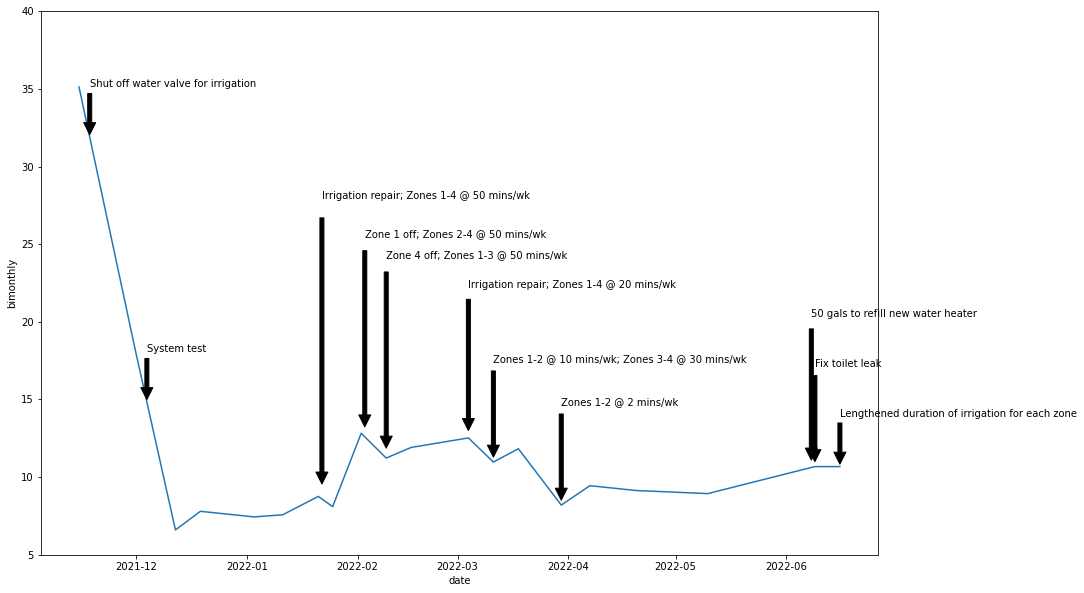

In [11]:
# Create figure
fig, ax = plt.subplots(figsize=(15,10))

# Draw line plot
sns.lineplot(x=merged.index, y=merged.bimonthly)

# Loop through annotations dataframe
for index, row in annotations.iterrows():
    ax.annotate(
        row['event'], 
        xy=(index, row['bimonthly']),
        xycoords='data',
        textcoords='offset pixels',
        xytext=(0, 50 * row['textoffsetmult']),
        arrowprops=dict(facecolor='black', shrink=-.05)
    )

ax.set(ylim=(5,40));

I'm sure there's a better way to do this, but this will have to do for now!

It's nice to have some sense of what events may or may not be prompting changes in water usage, but considering that the irrigation is the main culprit here, what would be more useful is to check for correlation between our water usage and the watering duration per week for each of our four irrigation zones.